In [143]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

In [144]:
#imports
battles = pd.read_csv("hmb/battles.csv")
weather = pd.read_csv("hmb/weather.csv")

In [145]:
#Cleaning the weather data (removing empty weather)
weather = weather[pd.isna(weather.wx1)==False]
weather = weather[pd.isna(weather.wx2)==False]
weather = weather[pd.isna(weather.wx3)==False]
weather = weather[pd.isna(weather.wx4)==False]
weather = weather[pd.isna(weather.wx5)==False]
#Cleaning battles
battles = battles[pd.isna(battles.inita)==False]
battles = battles[pd.isna(battles.wina)==False]

In [146]:
#Drop useless fields
drop_list = ['war','name','techa','kmda','crit','quala','resa','mobila','aira','fprepa','wxa','terra',
             'locn','campgn','postype','post1','post2','leadaa','plana','surpaa','mana','logsaa',
             'fortsa','deepa','is_hero','war2','war3','war4','war4_theater','dbpedia', 'cow_warno',
             'cow_warname','war_initiator','parent',
             'front','depth','time','aeroa','surpa','cea','leada',
             'trnga','morala','logsa','momnta','intela']

battles.drop(drop_list, axis=1,inplace = True)

In [147]:
#info of what is left
battles.info

<bound method DataFrame.info of      isqno  inita  wina
1        2    1.0   1.0
2        3    0.0   1.0
4        5    0.0   1.0
6        7    1.0   1.0
8        9    1.0   1.0
10      11    1.0   1.0
11      12    1.0   1.0
12      13    1.0   1.0
13      14    1.0   1.0
14      15    1.0   1.0
16      17    1.0   1.0
17      18    1.0   1.0
18      19    1.0   1.0
19      20    1.0   1.0
20      21    0.0   1.0
22      23    1.0   1.0
25      26    1.0   1.0
26      27    1.0   1.0
27      28    1.0   1.0
28      29    1.0   1.0
29      30    1.0   1.0
31      32    1.0   1.0
32      33    1.0   1.0
33      34    1.0   1.0
34      35    1.0   1.0
35      36    0.0   0.0
36      37    1.0   1.0
37      38    1.0   1.0
39      40    2.0   1.0
41      42    1.0   1.0
..     ...    ...   ...
568    569    0.0   1.0
569    570    0.0   1.0
570    571    0.0   1.0
571    572    0.0   1.0
575    576    1.0   1.0
576    577    0.0   1.0
577    578    1.0   1.0
579    580    1.0   1.0
580    5

In [148]:
#Concat and Droping primary_id useless
result = pd.concat([battles,weather], axis=1, join='inner')

drop_list = ['isqno']
result.drop(drop_list, axis=1,inplace = True)

In [149]:
resultInitWin = result[result.inita==1.0]
resultInitWin = resultInitWin[resultInitWin.wina==1.0]
resultInitWin.info


<bound method DataFrame.info of      inita  wina  wxno wx1 wx2 wx3 wx4 wx5
1      1.0   1.0     1   D   S   T   W   T
6      1.0   1.0     1   D   S   T   $   T
8      1.0   1.0     1   D   S   T   F   T
10     1.0   1.0     1   D   S   T   F   T
11     1.0   1.0     1   D   S   T   F   T
12     1.0   1.0     1   D   S   T   $   T
13     1.0   1.0     1   D   S   T   F   T
14     1.0   1.0     1   D   S   T   S   T
16     1.0   1.0     1   D   S   T   $   T
17     1.0   1.0     1   D   S   T   S   T
18     1.0   1.0     1   D   S   T   S   T
19     1.0   1.0     1   D   S   T   F   T
22     1.0   1.0     1   D   S   T   S   T
25     1.0   1.0     1   W   H   T   S   T
26     1.0   1.0     1   W   L   T   F   T
27     1.0   1.0     1   D   S   T   F   T
28     1.0   1.0     1   D   S   H   S   T
29     1.0   1.0     1   D   S   T   S   T
31     1.0   1.0     1   D   S   T   F   T
32     1.0   1.0     1   W   L   C   F   T
33     1.0   1.0     1   D   S   T   S   T
34     1.0   1.0     1

D    192
W     83
Name: wx1, dtype: int64


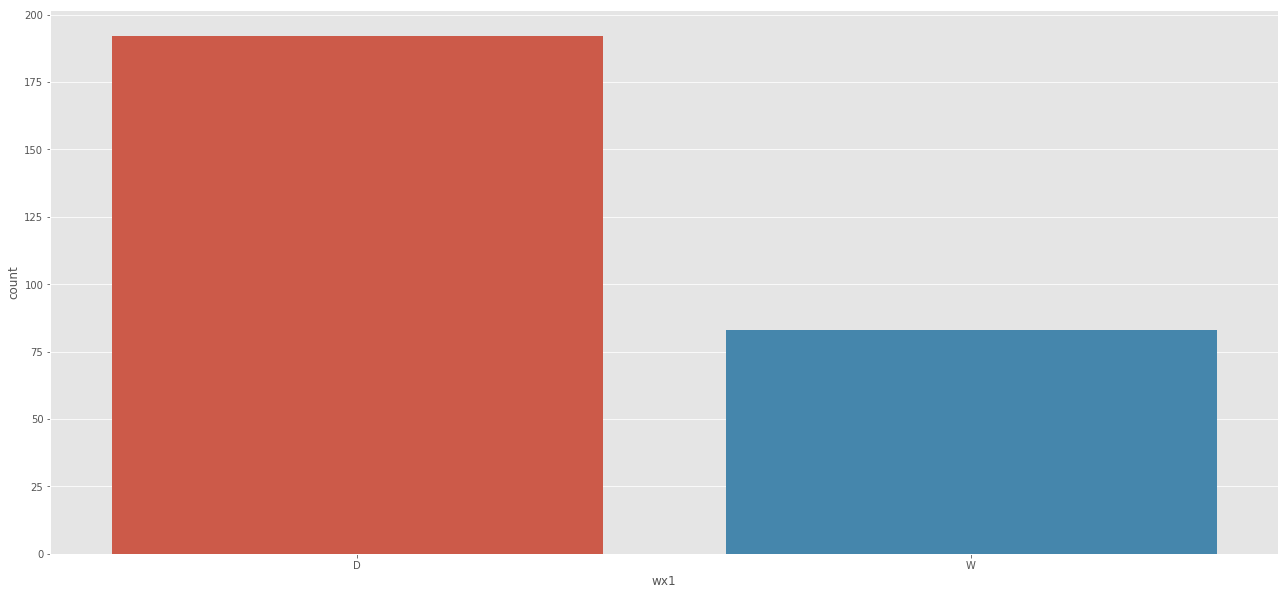

In [150]:
#show climate
#D - DRY
#W - WET
print(resultInitWin['wx1'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultInitWin['wx1'])
plt.show()

S    192
L     58
H     25
Name: wx2, dtype: int64


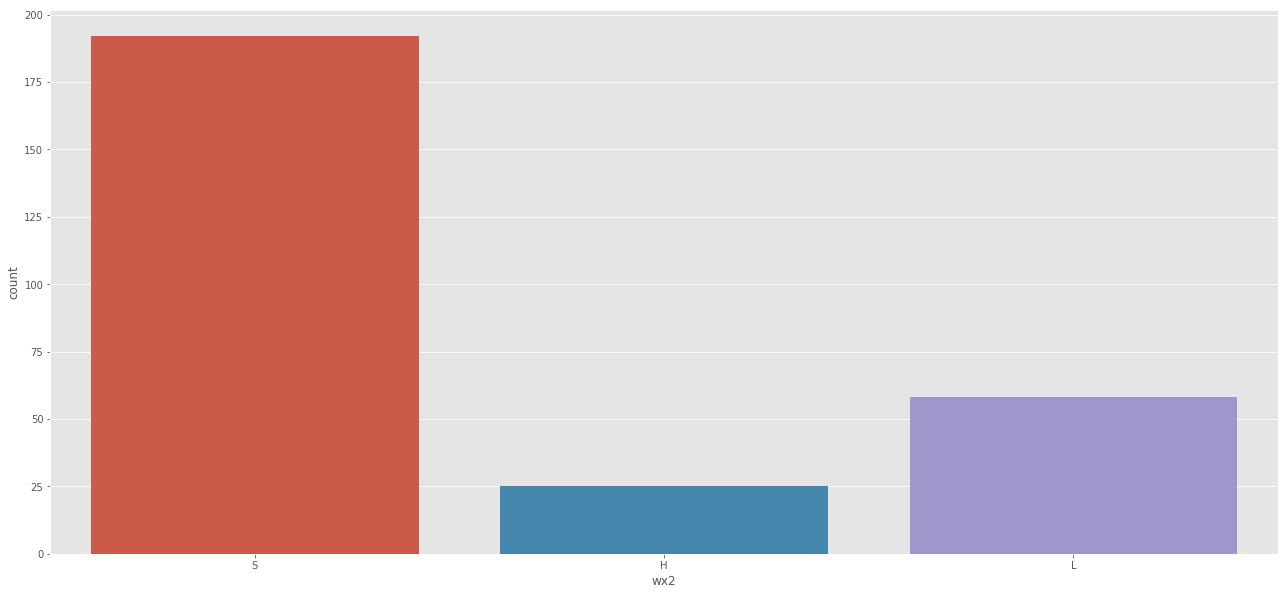

In [151]:
#show climate
#H - Heavy Precipitatiion
#S - Sunny
#L - Light Precipitation
#O - Overcast (no precipitation)
print(resultInitWin['wx2'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultInitWin['wx2'])
plt.show()

T    232
C     27
H     16
Name: wx3, dtype: int64


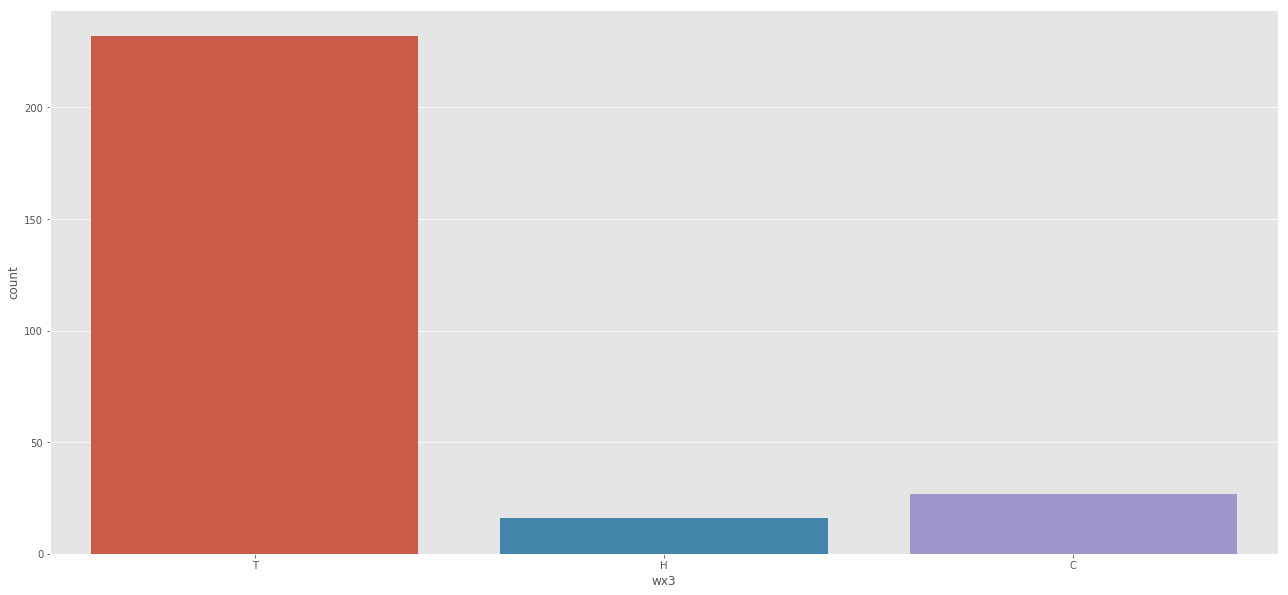

In [152]:
#show climate
#H - Hot
#S - Cold
#T - Temperate
print(resultInitWin['wx3'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultInitWin['wx3'])
plt.show()

S    95
F    90
$    62
W    28
Name: wx4, dtype: int64


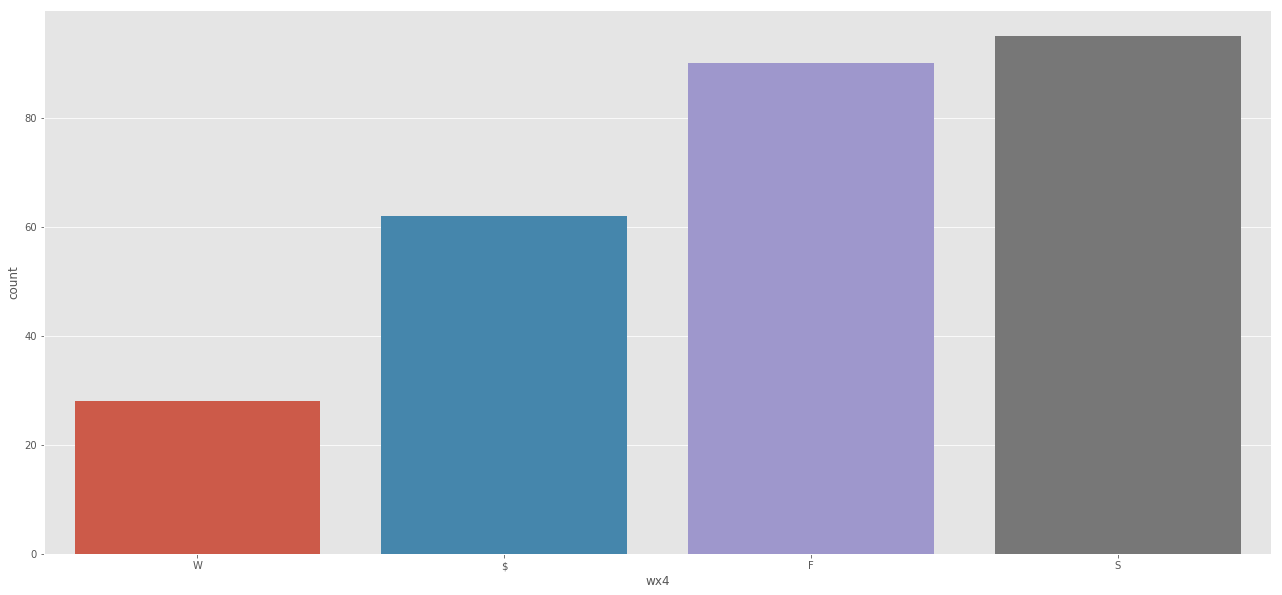

In [153]:
#show climate
#$ - Spring
#S - Summer
#W - Winter
#F - Fall
print(resultInitWin['wx4'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultInitWin['wx4'])
plt.show()

T    268
D      5
E      2
Name: wx5, dtype: int64


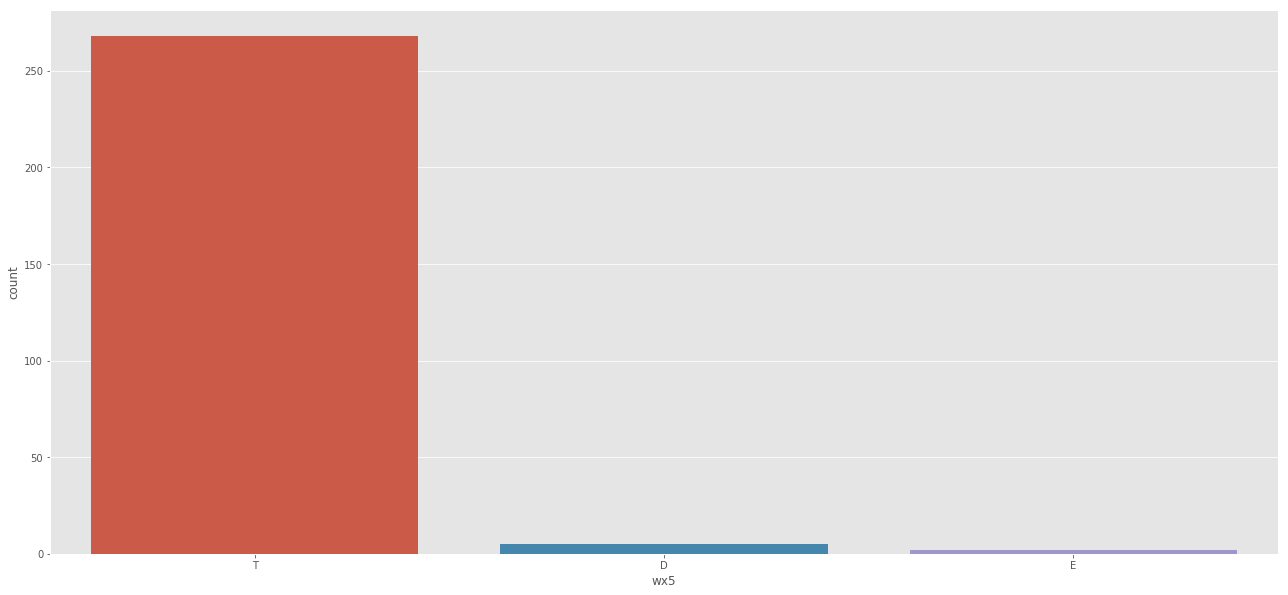

In [154]:
#show climate
#E - Tropical (i.e., "Equatorial")
#D - Desert
#T - Temperate
print(resultInitWin['wx5'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(resultInitWin['wx5'])
plt.show()

In [155]:
resultInitWin.head()

,inita,wina,wxno,wx1,wx2,wx3,wx4,wx5
1,1.0,1.0,1,D,S,T,W,T
6,1.0,1.0,1,D,S,T,$,T
8,1.0,1.0,1,D,S,T,F,T
10,1.0,1.0,1,D,S,T,F,T
11,1.0,1.0,1,D,S,T,F,T


In [156]:
X = result.iloc[:, 0:274].values  
y = result.iloc[:, 0:1].values

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [158]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

ValueError: could not convert string to float: 'T'